In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
base=pd.read_csv('petr4_treinamento.csv')
base=base.dropna()
base_treinamento=base.iloc[:, 1:2].values

In [27]:
normalizador=MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

In [28]:
previsores=[]
preco_real=[]
for i in range(90,1242):
    previsores.append(base_treinamento_normalizada[i-90:i,0])
    preco_real.append(base_treinamento_normalizada[i,0])
previsores,preco_real=np.array(previsores), np.array(preco_real)
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

In [29]:
regressor=Sequential()
regressor.add(LSTM(units=100,return_sequences=True, input_shape= (previsores.shape[1],1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units=1,activation='linear'))

regressor.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=['mean_absolute_error'])

regressor.fit(previsores,preco_real, epochs=100, batch_size=32)

c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0548 - mean_absolute_error: 0.1768
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0178 - mean_absolute_error: 0.1045
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 0.0112 - mean_absolute_error: 0.0824
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0122 - mean_absolute_error: 0.0852
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0103 - mean_absolute_error: 0.0773
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0099 - mean_absolute_error: 0.0778
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0086 - mean_absolute_error: 0.0708
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0076 - mean_absolute_error: 0.0673
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0079 - mean_absolute_error: 0.0683
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0083 - mean_absolute_error: 0.0684
Epoch 11/100
36/36 ━━━━━━

In [30]:
base_teste=pd.read_csv('petr4_teste.csv')
preco_real_teste=base_teste.iloc[:,1:2].values
base_completa=pd.concat((base['Open'], base_teste['Open']), axis=0)
entradas=base_completa[len(base_completa)-len(base_teste)-90:].values
entradas=entradas.reshape(-1,1)
entradas=normalizador.transform(entradas)

In [31]:
X_teste=[]
for i in range(90,112):
    X_teste.append(entradas[i-90:i,0])
X_teste=np.array(X_teste)
X_teste=np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1],1))

In [32]:
previsoes=regressor.predict(X_teste)
previsoes=normalizador.inverse_transform(previsoes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [33]:
previsoes.mean()
preco_real_teste.mean()

17.87454563636364

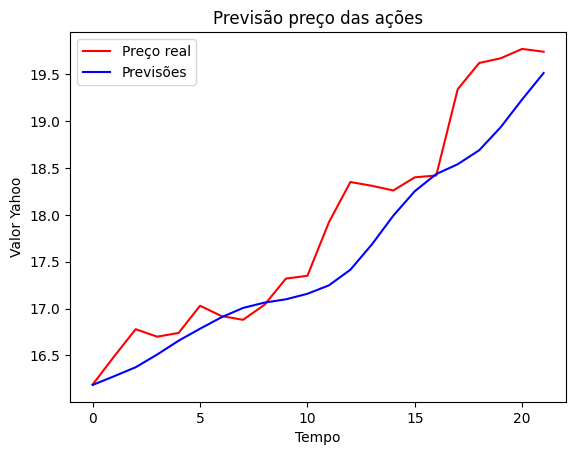

In [34]:
plt.plot(preco_real_teste, color = 'red', label = 'Preço real')
plt.plot(previsoes, color = 'blue', label = 'Previsões')
plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()